# Descripción Inicial

## Número de observaciones y variables	

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df1 = pd.read_csv('data\DataTiempos.csv')
df1.head()

,Sucursal,EstudioModalidad,ReservacionSP,TEPFechaEspera,TEPHoraInicio,TEPHoraFin,TEPMinutos,TAPFechaAtencion,TAPHoraInicio,TAPHoraFin,TAPMinutos
0,COYOACAN,DENSITOMETRIA,806115606,20250302,2025-03-02 13:20:00,2025-03-02T11:40:15.1130000,0.00,20250302,2025-03-02T11:40:15.1130000,2025-03-02T11:47:18.1700000,7.05
1,COYOACAN,DENSITOMETRIA,918870299,20250329,2025-03-29 07:11:15.77,2025-03-29T07:39:49.4000000,28.57,20250329,2025-03-29T07:39:49.4000000,2025-03-29T07:45:18.2300000,5.48
2,COYOACAN,DENSITOMETRIA,921436045,20250321,2025-03-21 15:55:53.723,2025-03-21T16:15:07.2300000,19.23,20250321,2025-03-21T16:15:07.2300000,2025-03-21T16:21:50.1270000,6.72
3,COYOACAN,DENSITOMETRIA,923595474,20250301,2025-03-01 08:03:01.36,2025-03-01T09:42:16.9900000,99.25,20250301,2025-03-01T09:42:16.9900000,2025-03-01T09:48:03.5770000,5.78
4,COYOACAN,DENSITOMETRIA,926170090,20250302,2025-03-02 09:40:00,2025-03-02T09:20:46.2400000,0.00,20250302,2025-03-02T09:20:46.2400000,2025-03-02T09:27:47.6170000,7.02


In [2]:
df1.shape

(109167, 11)

La base de datos de tiempos, que será la utilizada para la problemática de ruta óptima en la clínica cuenta con 11 variables y 109,167 observaciones.

## Breve descripción de las variables

### Tipo de datos:

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109167 entries, 0 to 109166
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sucursal          109167 non-null  object 
 1   EstudioModalidad  109167 non-null  object 
 2   ReservacionSP     109167 non-null  int64  
 3   TEPFechaEspera    109167 non-null  int64  
 4   TEPHoraInicio     108867 non-null  object 
 5   TEPHoraFin        107554 non-null  object 
 6   TEPMinutos        109167 non-null  float64
 7   TAPFechaAtencion  109167 non-null  int64  
 8   TAPHoraInicio     107552 non-null  object 
 9   TAPHoraFin        107716 non-null  object 
 10  TAPMinutos        106101 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 9.2+ MB


Variables tipo object: Sucursal, EstudioModalidad, TEPHoraInicio, TEPHoraFin, TAPHoraInicio, TAPHoraFin 

Variables tipo int: ReservacionSP, TEPFechaEspera 

Variables tipo float: TEPMinutos, TAPMinutos 

### Significado de cada variable y unidades de medida:

| Variable                | Descripción                                            | Unidad / Formato         |
| ----------------------- | -------------------------------------------------------| -------------------------|
| `Sucursal`              | Nombre de la sucursal donde se brindó el servicio      | Texto                    |
| `EstudioModalidad`      | Tipo de estudio o modalidad solicitada                 | Texto                    |
| `ReservacionSP`         | Número identificador de la reservación                 | Entero                   |
| `TEPFechaEspera`        | Fecha en que inicia el tiempo de espera                | Entero (AAAAMMDD)        |
| `TEPHoraInicio`         | Hora en que inicia el tiempo de espera                 | Cadena tipo fecha-hora   |
| `TEPHoraFin`            | Hora en que finaliza el tiempo de espera               | Cadena tipo fecha-hora   |
| `TEPMinutos`            | Duración del tiempo de espera                          | Minutos (número decimal) |
| `TAPFechaAtencion`      | Fecha en que se brindó la atención                     | Entero (AAAAMMDD)        |
| `TAPHoraInicio`         | Hora en que inicia la atención médica                  | Cadena tipo fecha-hora   |
| `TAPHoraFin`            | Hora en que finaliza la atención médica                | Cadena tipo fecha-hora   |
| `TAPMinutos`            | Duración del tiempo de atención                        | Minutos (número decimal) |


## Variables categóricas

In [4]:
print("Sucursales disponibles: ",df1['Sucursal'].unique())
print("\nTipos de estudios disponibles: ",df1['EstudioModalidad'].unique())

Sucursales disponibles:  ['COYOACAN' 'CULIACAN' 'CULIACAN CAÑADAS' 'CULIACAN COLEGIO MILITAR'
 'CULIACAN LA CONQUISTA' 'CULIACAN LAS TORRES' 'CULIACAN NAKAYAMA'
 'CULIACAN UNIVERSITARIOS']

Tipos de estudios disponibles:  ['DENSITOMETRIA' 'ELECTROCARDIOGRAMA' 'LABORATORIO' 'MASTOGRAFIA'
 'NUTRICION' 'OPTOMETRIA' 'PAPANICOLAOU' 'RAYOS X' 'RESONANCIA MAGNETICA'
 'TOMOGRAFIA' 'ULTRASONIDO']


Las variables categóricas son las sucursales donde el paciente se atendió y también el tipo de examen o estudio que se hizo. 

# Exploración de los datos

## Estadísticas descriptivas

In [5]:
df1.describe()

,ReservacionSP,TEPFechaEspera,TEPMinutos,TAPFechaAtencion,TAPMinutos
count,1.091670e+05,1.091670e+05,109167.000000,1.091670e+05,106101.000000
mean,8.736818e+08,2.025032e+07,56.199981,2.025032e+07,7.967964
std,3.282144e+08,8.931552e+00,1439.979001,8.933601e+00,56.840450
min,3.498895e+07,2.025030e+07,0.000000,2.025030e+07,-97.480000
25%,9.951073e+08,2.025031e+07,0.000000,2.025031e+07,3.280000
50%,1.000753e+09,2.025032e+07,2.530000,2.025032e+07,5.980000
75%,1.006304e+09,2.025032e+07,8.980000,2.025032e+07,9.350000
max,1.011670e+09,2.025033e+07,177096.130000,2.025033e+07,11504.100000


De esta tabla, podemos ignorar la variable `ReservacionSP`, ya que aunque la variable es un int, solo es un identificador de la reservación. Las demás variables son las que nos importan para esta situación problema. Para `TEPFechaEspera` y `TAPFechaAtencion` representan fechas en formato entero, las cuales todas correspondientes a marzo de 2025 (lo cual ya sabíamos porque el socio formador nos dijo que nos iba a dar las observaciones de un mes). `TEPMinutos`, que es tiempo de espera, tiene una media de 56.2 minutos, pero una desviación estándar muy alta (1439.98) y una mediana de solo 2.53 minutos, lo que indica una distribución muy sesgada hacia valores extremos. El valor máximo de espera es 177,096 minutos ( aproximadamente 123 días), lo cual probablemente representa un dato atípico o erróneo. El 75% de los usuarios esperó menos de 9 minutos. Viendo esta descripción inicial podemos ver que los datos tienen valores atípicos. En cuanto a `TAPMinutos`, la media es de 8 minutos, y la mediana de 5.98, lo cual sugiere una distribución más razonable. Sin embargo, también hay valores negativos, lo cual es físicamente imposible, y se podrían descartar y un máximo de 11,504 minutos (aproximadamente 8 días), lo que indica posibles errores o inconsistencias en los datos. Aunque, el Socio Formador nos dijo que después de haber pagado los estudios, el paciente tiene un mes para ir a hacerselos, por lo que técnicamente no es un valor atípico. Para cuestiones de esta situación problema, si se tomará como un outlier. 

## Gráficas exploratorias relevantes (histogramas, box plots, scatter plots, bar charts, etc.)

Se encontraron outliers en el análisis preliminar de este trabajo, en donde, encontrabamos casos de personas que duraban "esperando" alrededor de 121 días. Esto claramente es un error de la base de datos, y por ende, se limpiaron los outliers y se estableció que solo contarán los datos que sean menores a 43,200 minutos ya que son 30 días que tienen las personas para hacerse sus estudios

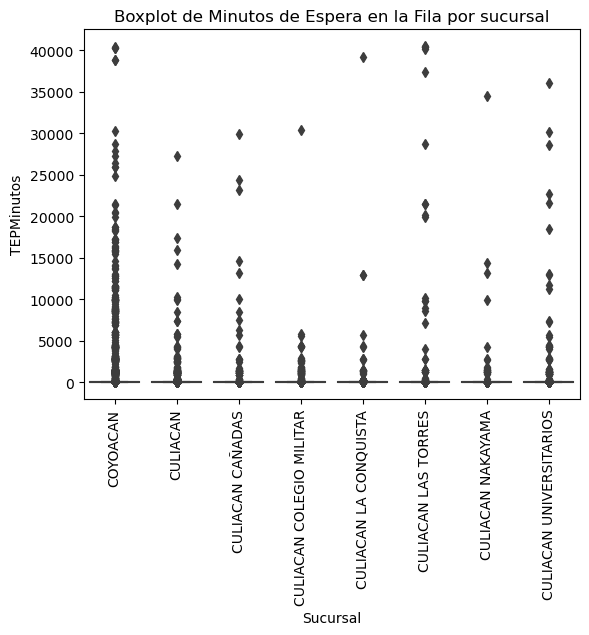

In [6]:
df_espera = df1[df1['TEPMinutos'] < 43200]
sns.boxplot(x='Sucursal', y='TEPMinutos', data=df_espera)
plt.xticks(rotation=90)
plt.title('Boxplot de Minutos de Espera en la Fila por sucursal')
plt.show()

Después, se buscó realizar un gráfico para cada una de las sucursales, en donde se puediera observar los minutos de atención por cada uno de los estudios que se realizan dentro de la clínica. De esta forma se puede observar de mejor manera si las sucursales funcionan de la misma forma o existen unas sucursales que tardan más de lo normal. Así mismo, se puso un límite de 36 horas porque creemos razonable que los clientes en algunos hayan tenido que esperar un día y medio si es que había mucha gente y tuvieran que regresar al día siguiente para poder hacerse sus estudios.

![](gs1.png)

En todas las sucursales, la mayoría de las modalidades tienen tiempos de atención concentrados entre 0 y 20 minutos, lo cual es esperable para muchos servicios ambulatorios. Se observan varios outliers, especialmente en estudios como Resonancia Magnética, Tomografía, y Rayos X, que tienden a mostrar: mayor mediana de duración, mayor variabilidad en los tiempos de atención y casos extremos con tiempos muy altos (más de 500 minutos).
Coyoacán y Culiacán tienen mayor dispersión en estudios como Resonancia Magnética y Tomografía. En Coyoacán, Rayos X también muestra una dispersión mayor comparada con otras sucursales. Por otro lado, Culiacán Cañadas, presenta distribuciones más compactas, con menos valores extremos. La atención en Ultrasonido y Rayos X es más homogénea. Y en Culiacán Colegio Militar también se presenta dispersión considerable en Resonancia Magnética y Tomografía, pero en general es más uniforme que Culiacán centro o Coyoacán.

![hola](g2.png)

La mayoría de las modalidades tienen tiempos de atención relativamente bajos y similares. Ultrasonido destaca con mayor variabilidad y un rango más amplio, así como múltiples outliers positivos, lo que indica que algunos estudios tardan significativamente más. Hay algunos valores atípicos negativos, lo cual no es físicamente posible, pueden ser errores en la capturación. La razón por la que separamos estas sucursales en un gráfico versus las otras es que estan sucursales son más pequeñas y no tienen tantos estudios como las otras. En general, podemos ver que el tiempo de atención de ultrasonido es más alto a comparación que los otros estudios para todas las sucursales.

### Histogramas en el tiempo de espera por estudio

![](g3.png)

Para estos gráficos, eliminamos los tiempos de espera mayor a 2 horas, lo que nos permitió ver mejor la distribución de los tiempos de espera por estudio. Podemos ver que los estudios con mayor distribución en el tiempo de espera y con mayores tiempos de espera son Optometría, Rayos X y Resonancia Mágnetica.

## Resumen de hallazgos importantes 

#### Tiempo promedio de espera en la fila por sucursal

In [8]:
df1.groupby('Sucursal')['TEPMinutos'].mean()

Sucursal
COYOACAN                     72.300367
CULIACAN                     36.938469
CULIACAN CAÑADAS             27.642193
CULIACAN COLEGIO MILITAR     54.132468
CULIACAN LA CONQUISTA        42.826846
CULIACAN LAS TORRES          67.250430
CULIACAN NAKAYAMA           101.117743
CULIACAN UNIVERSITARIOS      38.016023
Name: TEPMinutos, dtype: float64

Los datos muestran el tiempo promedio de espera, en minutos, por sucursal. La sucursal con el mayor tiempo de espera es CULIACÁN NAKAYAMA, con un promedio de 101.12 minutos, lo cual podría indicar una alta demanda de servicios o limitaciones en la capacidad operativa. Le siguen COYOACÁN con 72.30 minutos y CULIACÁN LAS TORRES con 67.25 minutos, también con promedios elevados que podrían requerir revisión de procesos. En contraste, la sucursal con el menor tiempo de espera es CULIACÁN CAÑADAS, con 27.64 minutos, lo que sugiere un buen desempeño operativo o una menor carga de trabajo. Entre estas dos situaciones extremas, hay otras sucursales como CULIACÁN UNIVERSITARIOS (38.01 minutos), CULIACÁN LA CONQUISTA (42.82 minutos) y CULIACÁN COLEGIO MILITAR (54.13 minutos), que presentan tiempos de espera intermedios. En general, se observa una importante variabilidad entre las sucursales, lo cual podría reflejar diferencias en la eficiencia operativa, la disponibilidad de personal o la demanda de servicios.

#### Tiempo promedio de espera por estudio

In [4]:
df1.groupby('EstudioModalidad')['TEPMinutos'].mean()

EstudioModalidad
DENSITOMETRIA            29.757799
ELECTROCARDIOGRAMA        3.565041
LABORATORIO               5.959501
MASTOGRAFIA              68.370663
NUTRICION                45.037655
OPTOMETRIA                8.313357
PAPANICOLAOU             39.832401
RAYOS X                  15.936725
RESONANCIA MAGNETICA    501.333736
TOMOGRAFIA               87.957236
ULTRASONIDO             236.057508
Name: TEPMinutos, dtype: float64

Los tiempos de espera promedio por tipo de estudio presentan una gran variabilidad. Destacan RESONANCIA MAGNÉTICA y ULTRASONIDO con los tiempos más altos, superando los 200 minutos , lo cual es congruente con los histogramas, lo que podría indicar una saturación significativa o recursos limitados para atender la demanda. También sobresalen TOMOGRAFÍA, MASTOGRAFÍA y NUTRICIÓN, con tiempos superiores a los 40 minutos. En contraste, estudios como ELECTROCARDIOGRAMA, LABORATORIO y OPTOMETRÍA mantienen tiempos mucho más bajos, por debajo de los 10 minutos, lo que sugiere una atención más ágil en estas áreas. Estas diferencias reflejan la necesidad de revisar procesos y capacidad operativa, especialmente en los estudios con mayor tiempo de espera.

#### Tiempo promedio de atención por estudio

In [3]:
df1.groupby('EstudioModalidad')['TAPMinutos'].mean()

EstudioModalidad
DENSITOMETRIA            7.097522
ELECTROCARDIOGRAMA       6.781235
LABORATORIO              3.310089
MASTOGRAFIA              8.297301
NUTRICION               12.433075
OPTOMETRIA              10.280794
PAPANICOLAOU             7.737526
RAYOS X                  5.155964
RESONANCIA MAGNETICA    36.080671
TOMOGRAFIA              19.062311
ULTRASONIDO             15.350868
Name: TAPMinutos, dtype: float64

En general, los tiempos promedio de espera varían significativamente entre los distintos tipos de estudio. Las modalidades como LABORATORIO, RAYOS X y ELECTROCARDIOGRAMA presentan tiempos de espera relativamente bajos, por debajo de los 7 minutos, lo que sugiere procesos más ágiles o mayor disponibilidad. En contraste, estudios como RESONANCIA MAGNÉTICA, TOMOGRAFÍA y ULTRASONIDO muestran tiempos de espera considerablemente más altos, superando los 15 minutos, siendo RESONANCIA MAGNÉTICA la que registra el mayor promedio con más de 36 minutos. Estos resultados reflejan diferencias importantes en la complejidad del estudio o en la capacidad instalada para atender la demanda.

#### Tiempo promedio de atención por Sucursal

In [5]:
df1.groupby('Sucursal')['TAPMinutos'].mean()

Sucursal
COYOACAN                    8.386956
CULIACAN                    9.082874
CULIACAN CAÑADAS            7.096294
CULIACAN COLEGIO MILITAR    8.215843
CULIACAN LA CONQUISTA       5.904899
CULIACAN LAS TORRES         6.621328
CULIACAN NAKAYAMA           6.615168
CULIACAN UNIVERSITARIOS     6.573067
Name: TAPMinutos, dtype: float64

Se puede ver que el tiempo promedio de atención de todas las sucursales en general es de entre 6 minutos a 10 minutos, lo cual es bueno. Esta dentro del margen establecido por el Socio Formador.

## Identificación de variables potencialmente relevantes

Los datos que nos important más en este problema son los de `TEPHoraInicio`, `TEPHoraFin` y `TEPMinutos`, ya que son los que nos dicen cuánto esperó cada paciente en ser atendido. Para poder minimizar este tiempo, necesitamos optimizar la ruta que toma cada paciente en hacer sus estudios. Claramente tambien necesitamos `EstudioModadlidad` para saber que estudio se hará la persona y saber el tiempo promedio de atención de ese estudio y el tiempo promedio de espera en ese estudio. Viendo que los tiempos pueden variar mucho por sucursal, valdría la pena hacer que la solución identifique que sucursal es para tener una ruta más exacta. 

## Identificación de transformaciones prometedoras si existen o posibles variables nuevas

Con información adicional proporcionada por el socioformador, una posible transformación prometedora sería la de consolidar varios estudios médicos de un mismo paciente en una sola base de datos. Esto permitiría rastrear la trayectoria clínica de cada paciente de manera más precisa a lo largo del tiempo, lo que facilitaría la identificación de patrones de evolución y la detección temprana de posibles complicaciones. Además, al reunir los datos de múltiples visitas o estudios en un único perfil, se podría aplicar un análisis longitudinal para observar tendencias y predecir posibles necesidades futuras de atención.

Otra posible transformación podría ser la simulación de llegada de pacientes, lo que permitiría poner a prueba nuestro algoritmo en un entorno más dinámico y realista. Este enfoque permitiría evaluar la efectividad del modelo no solo en términos de clasificación de diagnósticos, sino también en cuanto a su capacidad para predecir tiempos de espera, optimizar el flujo de pacientes y mejorar la asignación de recursos dentro de la clínica.

## Evaluación de la calidad de los datos

## Detección y cuantificación de valores faltantes, outliers y errores

In [22]:
df_outliers_amount = len(df1[df1['TEPMinutos'] == 0]) + len(df1[df1['TEPMinutos'] > 43200])
print(f"Número de datos erróneas: {df_outliers_amount}")
print(f"Porcentaje de datos erróneas: {(df_outliers_amount*100)/len(df1)}")

Número de datos erróneas: 28253
Porcentaje de datos erróneas: 25.88053166249874


El análisis del conjunto de datos revela que hay un total de 28,253 registros erróneos, lo que representa aproximadamente el 25.88% del total de los datos. Este porcentaje es significativo, ya que más de una cuarta parte del conjunto de datos contiene errores, lo cual puede tener un impacto considerable en la calidad y la fiabilidad de la solución generada. Los errores en los datos podrían deberse a diversas razones, como valores faltantes (en algunas variables podemos ver que hay muchos valores faltantes), inconsistencias en los formatos de entrada, o la presencia de valores atípicos que no siguen el patrón general del conjunto de datos.

Es crucial abordar estos errores antes de proceder con el análisis, ya que los datos erróneos pueden llevar a resultados imprecisos, afectar la capacidad de la solución para aprender patrones correctos, y generar predicciones erróneas. Las estrategias para manejar los datos erróneos incluyen la limpieza de datos, como la identificación y corrección de inconsistencias, la imputación de valores faltantes utilizando los valores promedios por sucursal y por estudio, o el tratamiento de los valores atípicos que podrían estar distorsionando la distribución de los datos.

## Discusión sobre la calidad general de los datos y posibles problemas que podrían afectar el análisis futuro.

Para mejorar la calidad de los datos y construir una solución más precisa para la optimización de las rutas de los pacientes, una estrategia efectiva sería realizar un análisis por sucursal, ya que esto permitirá entender mejor las variaciones en los tiempos de espera y atención dependiendo de la localización de cada paciente. Al dividir los datos por sucursal, se puede detectar si existen patrones específicos que varíen entre diferentes lugares y ajustar el modelo en consecuencia.

En cuanto a la limpieza de los datos,se van a eliminar, o ignorar, las columnas que no aportan valor significativo para la solución del problema, como aquellas que no están directamente relacionadas con los tiempos de espera y atención, o que no tienen relevancia en la determinación de la ruta óptima. Sin embargo, las columnas clave, como `TEPMinutos`, `TAPMinutos`, `TEPHoraInicio`, `TAPHoraInicio`, entre otras, son esenciales para la optimización, por lo que cualquier valor faltante en ellas será imputado de manera cuidadosa. Una estrategia adecuada sería realizar una imputación simple utilizando la media de cada variable, considerando tanto la sucursal como el tipo de estudio, para asegurar que los valores faltantes sean reemplazados de manera coherente y específica para cada grupo. Esto ayudará a que los datos imputados reflejen con mayor exactitud las características de cada situación particular y mantengan la coherencia dentro de las diferentes sucursales y estudios.

También, creemos importante filtrar los valores extremadamente altos o fuera de rango, como los tiempos de espera o atención muy largos, que pueden ser producto de errores en la captura de datos. Estos valores atípicos podrían distorsionar el análisis y complicar la solución de manera innecesaria. 

Algunos problemas a futuro podrían ser:

1. La variabilidad de los tiempos de espera y atención podría cambiar con el tiempo debido a factores como la demanda, la capacidad de los laboratorios, o incluso cambios en los procedimientos. Esto podría requerir actualizaciones periódicas del modelo para garantizar que se mantenga relevante y preciso. 
    
2. La calidad de los datos siempre estará sujeta a los registros de los sistemas en las sucursales, por lo que si estos datos contienen errores sistemáticos no detectados, el modelo podría seguir teniendo limitaciones. 

La calidad de los datos es buena en términos generales, ya que contamos con una gran cantidad de registros, lo que es beneficioso para generar análisis robustos. Además, la diversidad en los tipos de estudio y las diferentes sucursales permite obtener una visualización más amplia de cómo varían los tiempos de espera y atención dependiendo del contexto específico. Sin embargo, existen algunos valores faltantes que pueden ser relevantes y errores en la recopilación de datos que podrían afectar la precisión del modelo. En resumen, aunque los datos tienen una base sólida, es necesario realizar acciones adicionales para corregir las inconsistencias y mejorar la calidad, lo que permitirá generar una solución más precisa y útil que represente una verdadera mejora para el socio formador.

## Estrategias preliminares para tratar los problemas identificados.

1. Clasificación de estudios por paciente: consultaremos al socioformador para determinar si es posible clasificar los estudios por paciente. Esta clasificación nos permitirá rastrear la trayectoria de cada paciente dentro de la clínica, lo que facilitará la creación de rutas óptimas basadas en el historial de atención de cada uno. 

2. Imputación de valores faltantes: para las columnas clave con valores faltantes, como `TAPMinutos`, se procederá a realizar una imputación simple utilizando la media, agrupando por sucursal y tipo de estudio. Esto garantizará que los datos imputados sean coherentes y representen adecuadamente los patrones de cada grupo específico.

3. Filtrado de outliers: los valores extremadamente altos en las columnas de `TAPMinutos` y `TEPMinutos` serán identificados como atípicos y descartados, ya que pueden ser producto de errores en la recopilación de datos y afectar negativamente los resultados del modelo.

4. Análisis por sucursal: se realizará un análisis detallado de los datos por sucursal para comprender las variaciones en los tiempos de espera y atención. Esto nos permitirá adaptar el modelo a las particularidades de cada sucursal y mejorar la precisión de la solución.

5. Simulación de la llegada de pacientes: Si no podemos clasificar los estudios por paciente, la creación de una base de datos simulada que represente la llegada de pacientes a la clínica nos permitirá probar diferentes escenarios y validar cómo varían los tiempos de espera y atención en función de las condiciones de la clínica.

# Primeros insights

## Identificación de patrones o correlaciones iniciales relevantes para el objetivo del reto.

El análisis inicial de los datos revela patrones y correlaciones significativas que son cruciales para abordar el reto de optimización. Se observa una notable variabilidad en los tiempos de espera tanto entre las diferentes sucursales como entre los distintos tipos de estudio, lo que sugiere que el tiempo de espera no es un fenómeno uniforme y que está influenciado por factores específicos de la sucursal y el tipo de estudio. Por ejemplo, algunas sucursales muestran tiempos de espera promedio considerablemente más altos que otras, y estudios como la Resonancia Magnética y el Ultrasonido tienden a tener tiempos de espera mucho más largos en comparación con estudios como el Electrocardiograma o el Laboratorio. Además, la presencia de valores atípicos y errores en los datos, como tiempos de espera extremadamente largos o duraciones negativas, plantea un problema de calidad de los datos que debe resolverse para garantizar la fiabilidad del análisis. Estos hallazgos iniciales sugieren que el enfoque analítico y de modelado posterior debe considerar la necesidad de un análisis estratificado por sucursal y tipo de estudio, la implementación de técnicas robustas de limpieza de datos y la posible ingeniería de características a partir de las variables de tiempo. Además, la complejidad del problema podría requerir el uso de modelos de simulación o algoritmos de optimización para capturar la dinámica del flujo de pacientes y optimizar las rutas de manera efectiva.

## Reflexión crítica

La exploración inicial de los datos revela varios hallazgos que tienen implicaciones importantes para el desarrollo de un modelo efectivo de optimización de rutas de pacientes. La marcada variabilidad en los tiempos de espera entre sucursales y tipos de estudio sugiere que no se puede aplicar un enfoque único para todos los casos; más bien, se requerirá un análisis estratificado que considere las características específicas de cada sucursal y estudio. La presencia de outliers y errores en los datos subraya la necesidad de implementar procedimientos robustos de limpieza y preprocesamiento de datos para evitar que estos elementos distorsionen los resultados del modelo. Además, la naturaleza de las variables de tiempo (`TEPHoraInicio`, `TEPHoraFin`) podría exigir la creación de nuevas características que capturen patrones temporales relevantes, como las horas pico o los días de la semana con mayor afluencia de pacientes. En última instancia, la complejidad del problema de optimización podría hacer necesario el uso de técnicas de modelado más avanzadas. 